In [1]:
import pandas as pd

# Merge reactome evidence and geneset targets

In [3]:
reactome_evidence = pd.read_csv("target_lists/reactome_evidence.csv", index_col=0)
reactome_evidence_select = reactome_evidence[["datasourceId", "approvedSymbol", "targetId", "diseaseId"]]

In [4]:
geneset_evidence = pd.read_csv("target_lists/from_reactome_dis_v2_pathways_only_genenames.csv", index_col=0)
geneset_evidence.rename(columns={"genes": "approvedSymbol"}, inplace=True)

# Filter out rows with null 'id' and 'library' not equal to 'Reactome_Pathways_2024' (because comparing with reactome)
geneset_evidence_id = geneset_evidence[geneset_evidence["id"].notnull()]
geneset_evidence_noreact = geneset_evidence_id[geneset_evidence_id["library"] != "Reactome_Pathways_2024"]

In [5]:
geneset_evidence_reactome = pd.merge(geneset_evidence_noreact, reactome_evidence_select, on=['approvedSymbol', 'diseaseId'], how='outer')

In [6]:
df_to_display = geneset_evidence_reactome[geneset_evidence_reactome["datasourceId"] == "reactome"]
df_to_display

,searchTerms,approvedSymbol,library,diseaseId,name,therapeuticAreas,id,datasourceId,targetId
3,NaN,AAAS,NaN,EFO_0000763,NaN,NaN,NaN,reactome,ENSG00000094914
4,NaN,AAAS,NaN,EFO_0000764,NaN,NaN,NaN,reactome,ENSG00000094914
5,NaN,AAAS,NaN,EFO_0007328,NaN,NaN,NaN,reactome,ENSG00000094914
6,NaN,AAAS,NaN,HP_0100727,NaN,NaN,NaN,reactome,ENSG00000094914
7,NaN,AAAS,NaN,MONDO_0100096,NaN,NaN,NaN,reactome,ENSG00000094914
...,...,...,...,...,...,...,...,...,...
6939,NaN,ZMYM2,NaN,EFO_0000198,NaN,NaN,NaN,reactome,ENSG00000121741
6940,NaN,ZMYM2,NaN,EFO_0000220,NaN,NaN,NaN,reactome,ENSG00000121741
6941,NaN,ZMYM2,NaN,EFO_0000339,NaN,NaN,NaN,reactome,ENSG00000121741
6942,NaN,ZMYM2,NaN,EFO_0000565,NaN,NaN,NaN,reactome,ENSG00000121741


# Plots

## Targets overlap: reactome vs genesets

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

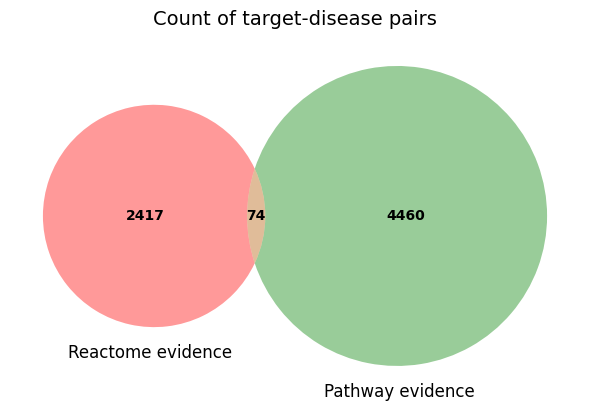

In [9]:
df = geneset_evidence_reactome
# Boolean masks
reactome_evidence = (df['datasourceId'] == 'reactome') & (df['library'].isna())
pathway_evidence = df['datasourceId'].isna() & df['library'].notna()
intersect = (df['datasourceId'] == 'reactome') & df['library'].notna()

# Counts
count_reactome = reactome_evidence.sum()
count_pathway = pathway_evidence.sum()
count_intersect = intersect.sum()


# Plot Venn diagram
plt.figure(figsize=(6, 6))
venn = venn2(subsets=(count_reactome, count_pathway, count_intersect),
             set_labels=('', ''))  # Remove default labels

# Make count labels bold
for text in venn.subset_labels:
    if text:
        text.set_fontweight('bold')

# Add custom labels below each circle (use fixed x positions)
plt.text(-0.49, -0.43, 'Reactome evidence', fontsize=12, ha='center')
plt.text(0.27, -0.55, 'Pathway evidence', fontsize=12, ha='center')

# Add title
plt.title('Count of target-disease pairs', fontsize=14)
plt.tight_layout()
plt.show()

## Number of targets per geneset

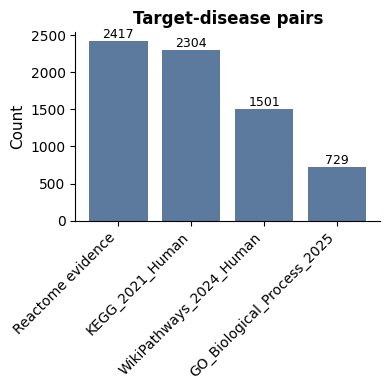

In [10]:
# Replace NaN in 'library' with 'Reactome evidence'
df['library'] = df['library'].fillna('Reactome evidence')

# Count the number of rows for each unique library
library_counts = df['library'].value_counts()

# Create the plot
plt.figure(figsize=(4, 4))
bars = plt.bar(library_counts.index, library_counts.values, color="#5B7A9D")

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Minimal ticks and labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count', fontsize=11)
plt.title('Target-disease pairs', fontsize=12, weight='bold')

# Optional: add count labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Numbers of targets per disease: reactome vs genesets

In [11]:
# Count how many rows fall into each category:
import numpy as np

reactome_only = df[(df['library'] == "Reactome evidence") & (df['datasourceId'] == 'reactome')]
pathway_only = df[(df['library'] != "Reactome evidence") & (df['datasourceId'].isna())]
both = df[(df['library'] != "Reactome evidence") & (df['datasourceId'].notna())]

print("Reactome only:", len(reactome_only))
print("Pathway only:", len(pathway_only))
print("Both:", len(both))


Reactome only: 2417
Pathway only: 4460
Both: 74


In [12]:
df = df[(df['library'] != "Reactome evidence")]

/var/folders/xs/llnz2_gn4fsfwjd4c0prr1w00000gp/T/ipykernel_33992/242656288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['library'] = df['library'].fillna('Reactome evidence')


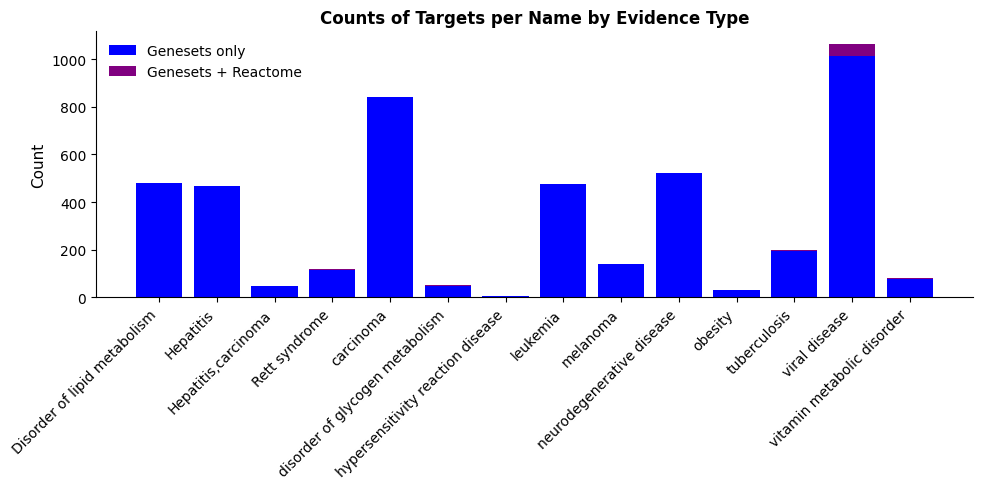

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df['library'] = df['library'].fillna('Reactome evidence')

reactome_only = (df['library'] == "Reactome evidence") #& (df['datasourceId'] == 'reactome')
pathway_only = (df['library'] != "Reactome evidence") & (df['datasourceId'].isna())
both = (df['library'] != "Reactome evidence") & (df['datasourceId'].notna())

counts_reactome = df.loc[reactome_only].groupby('name').size()
counts_pathway = df.loc[pathway_only].groupby('name').size()
counts_both = df.loc[both].groupby('name').size()

all_names = sorted(set(df['name'].astype(str)))

counts_reactome = counts_reactome.rename(index=str).reindex(all_names, fill_value=0)
counts_pathway = counts_pathway.rename(index=str).reindex(all_names, fill_value=0)
counts_both = counts_both.rename(index=str).reindex(all_names, fill_value=0)

plt.figure(figsize=(10, 5))
# bar1 = plt.bar(all_names, counts_reactome, color='red', label='Reactome only')
bar2 = plt.bar(all_names, counts_pathway, bottom=counts_reactome, color='blue', label='Genesets only')
bottom_both = counts_reactome + counts_pathway
bar3 = plt.bar(all_names, counts_both, bottom=bottom_both, color='purple', label='Genesets + Reactome')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count', fontsize=11)
plt.title('Counts of Targets per Name by Evidence Type', fontsize=12, weight='bold')
plt.legend(frameon=False, fontsize=10)

plt.tight_layout()
plt.show()


# All genesets

In [2]:
reactome_evidence = pd.read_csv("target_lists/reactome_evidence.csv", index_col=0)
reactome_evidence_select = reactome_evidence[["datasourceId", "approvedSymbol", "targetId", "diseaseId"]]

In [4]:
geneset_evidence = pd.read_csv("target_lists/from_reactome_dis_v1_genenames.csv", index_col=0)
geneset_evidence.rename(columns={"genes": "approvedSymbol"}, inplace=True)

# Filter out rows with null 'id' and 'library' not equal to 'Reactome_Pathways_2024' (because comparing with reactome)
geneset_evidence_id = geneset_evidence[geneset_evidence["id"].notnull()]
geneset_evidence_noreact = geneset_evidence_id[geneset_evidence_id["library"] != "Reactome_Pathways_2024"]

In [5]:
geneset_evidence_reactome = pd.merge(geneset_evidence_noreact, reactome_evidence_select, on=['approvedSymbol', 'diseaseId'], how='outer')

In [6]:
df_to_display = geneset_evidence_reactome[geneset_evidence_reactome["datasourceId"] == "reactome"]
df_to_display

,searchTerms,approvedSymbol,library,diseaseId,name,therapeuticAreas,id,datasourceId,targetId
6,NaN,AAAS,NaN,EFO_0000763,NaN,NaN,NaN,reactome,ENSG00000094914
7,NaN,AAAS,NaN,EFO_0000764,NaN,NaN,NaN,reactome,ENSG00000094914
9,NaN,AAAS,NaN,EFO_0007328,NaN,NaN,NaN,reactome,ENSG00000094914
10,NaN,AAAS,NaN,HP_0100727,NaN,NaN,NaN,reactome,ENSG00000094914
11,NaN,AAAS,NaN,MONDO_0100096,NaN,NaN,NaN,reactome,ENSG00000094914
...,...,...,...,...,...,...,...,...,...
28286,NaN,ZMYM2,NaN,EFO_0000198,NaN,NaN,NaN,reactome,ENSG00000121741
28287,NaN,ZMYM2,NaN,EFO_0000220,NaN,NaN,NaN,reactome,ENSG00000121741
28288,NaN,ZMYM2,NaN,EFO_0000339,NaN,NaN,NaN,reactome,ENSG00000121741
28289,NaN,ZMYM2,NaN,EFO_0000565,NaN,NaN,NaN,reactome,ENSG00000121741


# Plots

## Targets overlap: reactome vs genesets

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

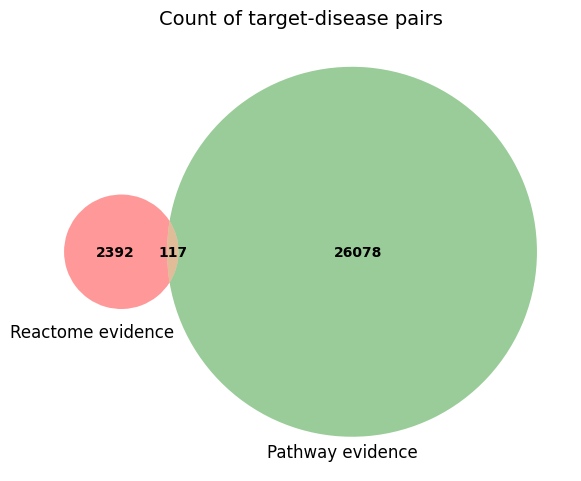

In [21]:
df = geneset_evidence_reactome
# Boolean masks
reactome_evidence = (df['datasourceId'] == 'reactome') & (df['library'].isna())
pathway_evidence = df['datasourceId'].isna() & df['library'].notna()
intersect = (df['datasourceId'] == 'reactome') & df['library'].notna()

# Counts
count_reactome = reactome_evidence.sum()
count_pathway = pathway_evidence.sum()
count_intersect = intersect.sum()


# Plot Venn diagram
plt.figure(figsize=(6, 6))
venn = venn2(subsets=(count_reactome, count_pathway, count_intersect),
             set_labels=('', ''))  # Remove default labels

# Make count labels bold
for text in venn.subset_labels:
    if text:
        text.set_fontweight('bold')

# Add custom labels below each circle (use fixed x positions)
plt.text(-0.7, -0.25, 'Reactome evidence', fontsize=12, ha='center')
plt.text(0.03, -0.6, 'Pathway evidence', fontsize=12, ha='center')

# Add title
plt.title('Count of target-disease pairs', fontsize=14)
plt.tight_layout()
plt.show()

## Number of targets per geneset

/var/folders/xs/llnz2_gn4fsfwjd4c0prr1w00000gp/T/ipykernel_62353/1655550489.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


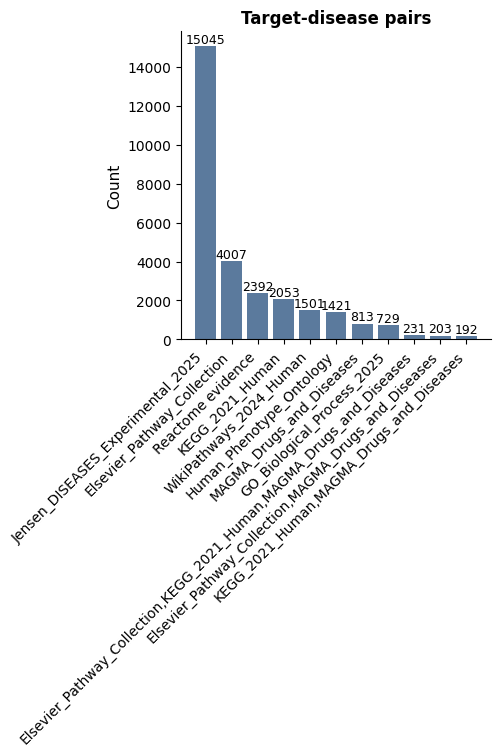

In [22]:
# Replace NaN in 'library' with 'Reactome evidence'
df['library'] = df['library'].fillna('Reactome evidence')

# Count the number of rows for each unique library
library_counts = df['library'].value_counts()

# Create the plot
plt.figure(figsize=(4, 4))
bars = plt.bar(library_counts.index, library_counts.values, color="#5B7A9D")

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Minimal ticks and labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count', fontsize=11)
plt.title('Target-disease pairs', fontsize=12, weight='bold')

# Optional: add count labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Numbers of targets per disease: reactome vs genesets

In [23]:
# Count how many rows fall into each category:
import numpy as np

reactome_only = df[(df['library'] == "Reactome evidence") & (df['datasourceId'] == 'reactome')]
pathway_only = df[(df['library'] != "Reactome evidence") & (df['datasourceId'].isna())]
both = df[(df['library'] != "Reactome evidence") & (df['datasourceId'].notna())]

print("Reactome only:", len(reactome_only))
print("Pathway only:", len(pathway_only))
print("Both:", len(both))


Reactome only: 2392
Pathway only: 26078
Both: 117


In [24]:
df = df[(df['library'] != "Reactome evidence")]

/var/folders/xs/llnz2_gn4fsfwjd4c0prr1w00000gp/T/ipykernel_62353/1895180491.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['library'] = df['library'].fillna('Reactome evidence')


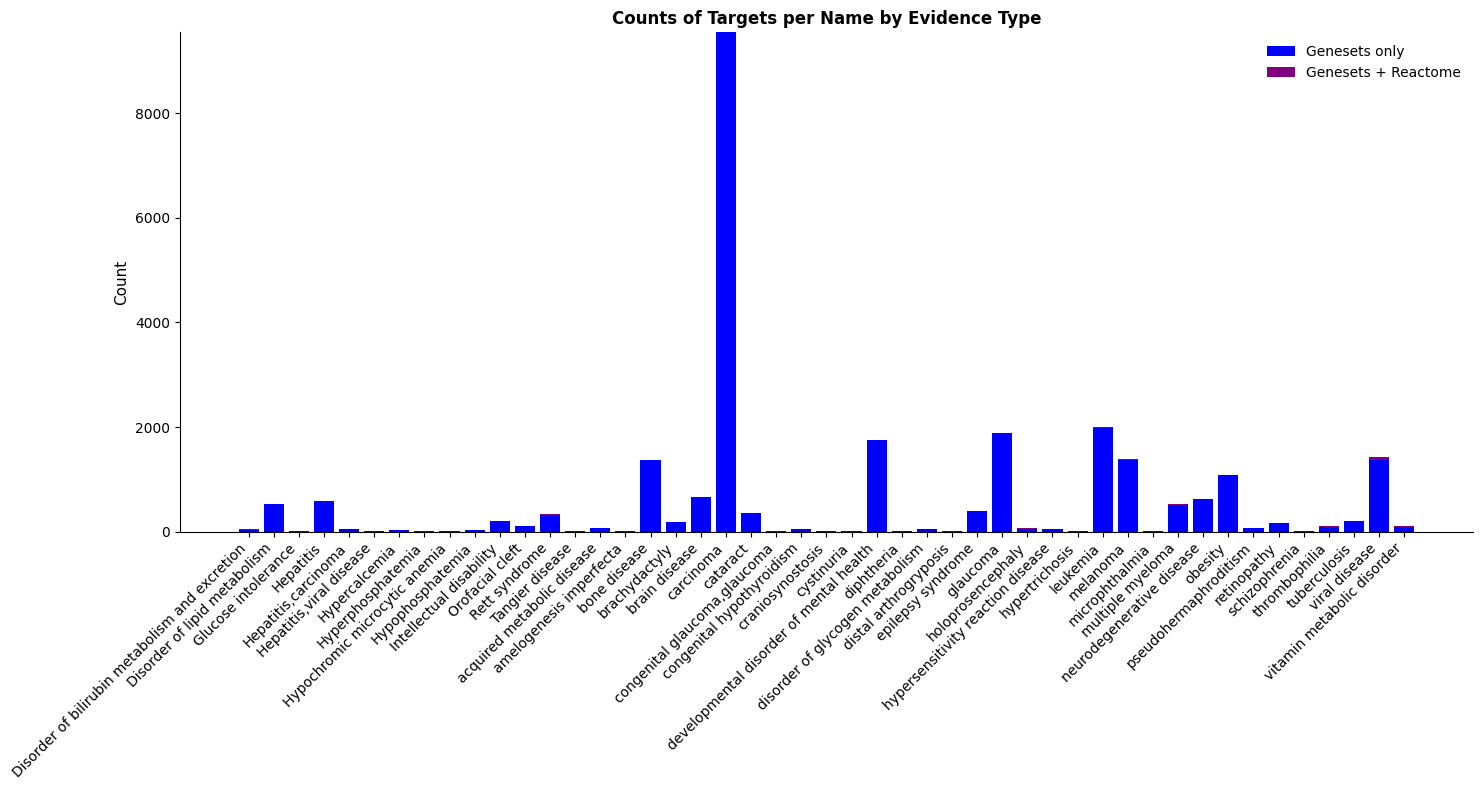

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df['library'] = df['library'].fillna('Reactome evidence')

reactome_only = (df['library'] == "Reactome evidence") #& (df['datasourceId'] == 'reactome')
pathway_only = (df['library'] != "Reactome evidence") & (df['datasourceId'].isna())
both = (df['library'] != "Reactome evidence") & (df['datasourceId'].notna())

counts_reactome = df.loc[reactome_only].groupby('name').size()
counts_pathway = df.loc[pathway_only].groupby('name').size()
counts_both = df.loc[both].groupby('name').size()

all_names = sorted(set(df['name'].astype(str)))

counts_reactome = counts_reactome.rename(index=str).reindex(all_names, fill_value=0)
counts_pathway = counts_pathway.rename(index=str).reindex(all_names, fill_value=0)
counts_both = counts_both.rename(index=str).reindex(all_names, fill_value=0)

plt.figure(figsize=(15, 8))
# bar1 = plt.bar(all_names, counts_reactome, color='red', label='Reactome only')
bar2 = plt.bar(all_names, counts_pathway, bottom=counts_reactome, color='blue', label='Genesets only')
bottom_both = counts_reactome + counts_pathway
bar3 = plt.bar(all_names, counts_both, bottom=bottom_both, color='purple', label='Genesets + Reactome')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Count', fontsize=11)
plt.title('Counts of Targets per Name by Evidence Type', fontsize=12, weight='bold')
plt.legend(frameon=False, fontsize=10)

plt.tight_layout()
plt.show()
